In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import torch
import tensorflow as tf
# from tfm.vision.backbones import EfficientNet
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import torchvision
import numpy as np
from torchvision.models import vgg19
from torchvision import transforms
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torch.nn.functional import softmax
from torchvision.models.detection.rpn import RegionProposalNetwork
from torchvision.models import efficientnet_b0
from torchvision.transforms import InterpolationMode

# **Backbone ResNet50**

In [2]:
model = fasterrcnn_resnet50_fpn(pretrained=True,weights='DEFAULT') #COCO_V1
model.eval()  # Mode évaluation
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
print("Modèle avec Eesnet50 comme backbone chargé avec succès.")

Modèle avec Eesnet50 comme backbone chargé avec succès.


In [3]:
url = "./Img_Test/Img_Test/img03.jpg"
image = Image.open(url).convert("RGB")
image_tensor = F.to_tensor(image)
images = [image_tensor]    

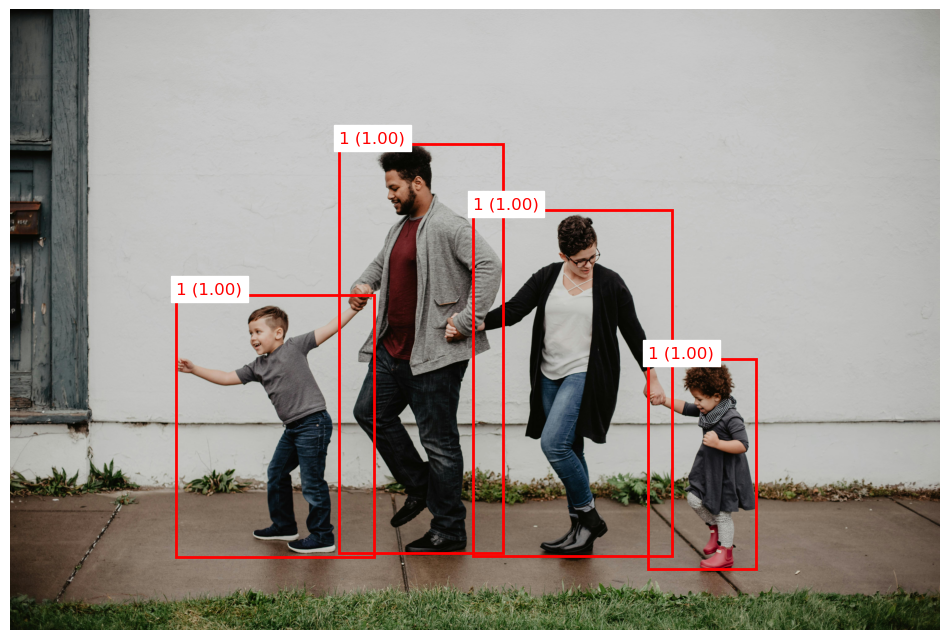

In [4]:
with torch.no_grad():
    predictions = model(images)
# Afficher les prédictions
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']
# Afficher l'image et les boîtes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)
# Ajouter les boîtes englobantes
for idx, box in enumerate(boxes):
    if scores[idx] > 0.7:  # Afficher uniquement les prédictions de haute confiance (score > 0.5)
        x1, y1, x2, y2 = box
        width = x2 - x1
        height = y2 - y1
        # Créer un rectangle pour chaque boîte englobante
        rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        # Ajouter l'étiquette et le score
        ax.text(x1, y1 - 10, f'{labels[idx].item()} ({scores[idx]:.2f})', color='red', fontsize=12, backgroundcolor='white')
plt.axis('off')
plt.show()

# **Backbone VGG19**

In [232]:
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# Charger le modèle VGG19 pré-entraîné
vgg19_model = vgg19(pretrained=True)
vgg19_features = vgg19_model.features
# Ajouter une couche d'adaptation pour correspondre à Faster R-CNN
vgg19_features.out_channels = 512  # Définir le nombre de canaux de sortie

# Définir un générateur d’ancres adapté
anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128, 256, 512),),  # Différentes tailles d'ancres
    aspect_ratios=((0.5, 1.0, 2.0),)  # Ratios largeur/hauteur
)

# Créer le modèle Faster R-CNN avec le backbone modifié
model = FasterRCNN(
    backbone=vgg19_features,
    num_classes=2,  
    rpn_anchor_generator=anchor_generator
)

# Mode évaluation (désactive le dropout et la normalisation batch)
model.eval()
print("Modèle avec VGG19 comme backbone chargé avec succès.")

Modèle avec VGG19 comme backbone chargé avec succès.


In [260]:
# Charger et prétraiter l'image
url = "./Img_Test/Img_Test/img03.jpg"
image = Image.open(url).convert("RGB")

# Transformer l'image (redimensionnement et conversion en tenseur)
transform = transforms.Compose([
    transforms.Resize((3000, 3000)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_tensor = transform(image).unsqueeze(0)  

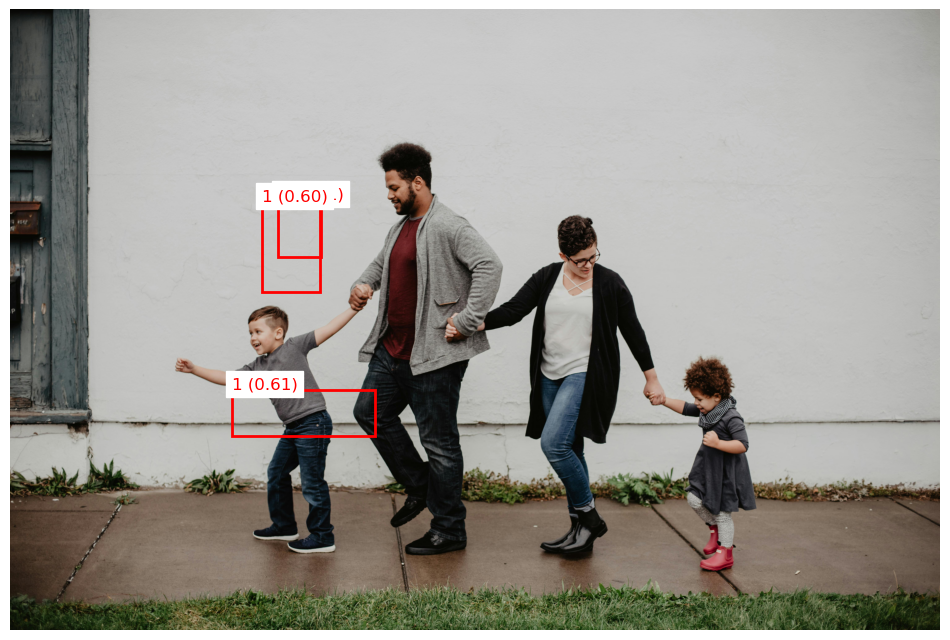

tensor([0.6113, 0.6052, 0.6005, 0.5983, 0.5963, 0.5947, 0.5904, 0.5894, 0.5887,
        0.5885, 0.5877, 0.5876, 0.5861, 0.5845, 0.5844, 0.5823, 0.5821, 0.5797,
        0.5785, 0.5782, 0.5774, 0.5756, 0.5744, 0.5743, 0.5741, 0.5735, 0.5714,
        0.5713, 0.5711, 0.5711, 0.5709, 0.5708, 0.5703, 0.5700, 0.5691, 0.5691,
        0.5686, 0.5683, 0.5683, 0.5680, 0.5670, 0.5669, 0.5668, 0.5665, 0.5661,
        0.5657, 0.5654, 0.5648, 0.5648, 0.5643, 0.5642, 0.5633, 0.5628, 0.5627,
        0.5626, 0.5625, 0.5624, 0.5614, 0.5613, 0.5607, 0.5604, 0.5602, 0.5599,
        0.5599, 0.5596, 0.5589, 0.5588, 0.5576, 0.5576, 0.5575, 0.5574, 0.5572,
        0.5571, 0.5568, 0.5563, 0.5562, 0.5559, 0.5555, 0.5554, 0.5552, 0.5544,
        0.5543, 0.5543, 0.5543, 0.5541, 0.5539, 0.5537, 0.5537, 0.5522, 0.5520,
        0.5517, 0.5517, 0.5515, 0.5505, 0.5501, 0.5500, 0.5500, 0.5499, 0.5494,
        0.5494])


In [262]:
# Faire une prédiction
# VGG_19 
with torch.no_grad():
    predictions = model(image_tensor)
# Afficher les prédictions
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']
# Afficher l'image et les boîtes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)
# Ajouter les boîtes englobantes
for idx, box in enumerate(boxes):
    if scores[idx] > 0.6:  # Afficher uniquement les prédictions de haute confiance (score > 0.5)
        x1, y1, x2, y2 = box
        width = x2 - x1
        height = y2 - y1
        # Créer un rectangle pour chaque boîte englobante
        rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        # Ajouter l'étiquette et le score
        ax.text(x1, y1 - 10, f'{labels[idx].item()} ({scores[idx]:.2f})', color='red', fontsize=12, backgroundcolor='white')
plt.axis('off')
plt.show()
print(scores)

# **Bacbone EfficientNet**

In [142]:
# Charger EfficientNet-B0 avec des poids pré-entraînés
efficientnet = efficientnet_b0(weights='DEFAULT')
backbone = efficientnet.features
backbone.out_channels = 1280

anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128, 256, 512),),  
    aspect_ratios=((0.5, 1.0, 2.0),)  
)

# Construire le modèle Faster R-CNN
model_EfficientNet = FasterRCNN(
    backbone=backbone,
    num_classes=2,  # Changez pour votre nombre réel de classes (+1 pour le fond)
    rpn_anchor_generator=anchor_generator
)
model_EfficientNet.eval()
print("Modèle avec EfficientNet comme backbone chargé avec succès.")

Modèle avec EfficientNet comme backbone chargé avec succès.


In [168]:
url = "./Img_Test/Img_Test/img03.jpg"
image = Image.open(url).convert("RGB")
image_tensor = F.to_tensor(image)
image_tensor = [image_tensor] 

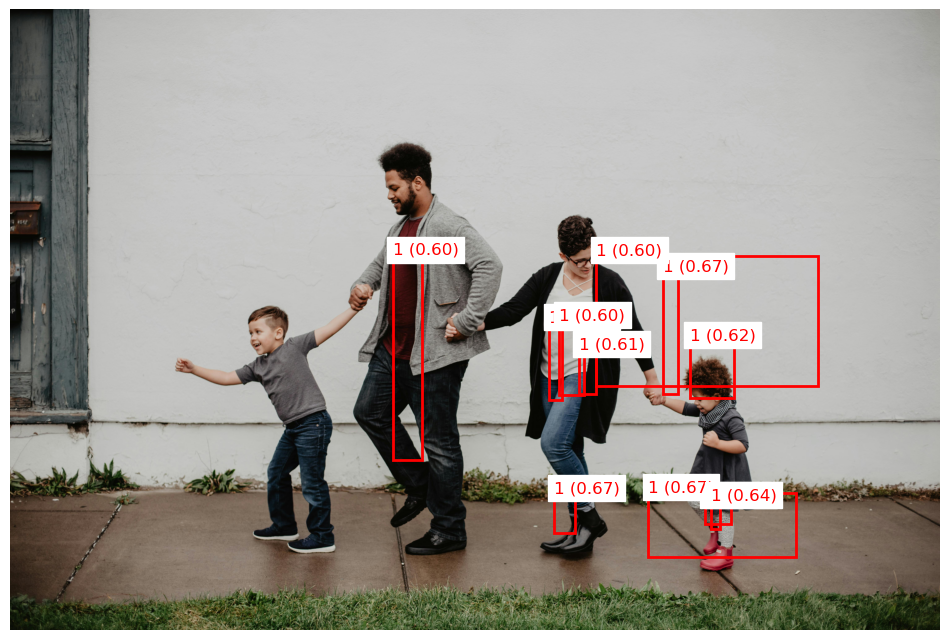

tensor([0.6799, 0.6714, 0.6695, 0.6670, 0.6418, 0.6152, 0.6087, 0.6063, 0.6022,
        0.6013, 0.6006, 0.5988, 0.5955, 0.5953, 0.5936, 0.5934, 0.5923, 0.5914,
        0.5909, 0.5895, 0.5892, 0.5890, 0.5890, 0.5889, 0.5886, 0.5881, 0.5878,
        0.5867, 0.5865, 0.5843, 0.5830, 0.5828, 0.5826, 0.5822, 0.5813, 0.5802,
        0.5791, 0.5779, 0.5778, 0.5773, 0.5770, 0.5761, 0.5744, 0.5742, 0.5742,
        0.5741, 0.5737, 0.5736, 0.5729, 0.5724, 0.5718, 0.5708, 0.5704, 0.5697,
        0.5690, 0.5689, 0.5686, 0.5684, 0.5680, 0.5674, 0.5671, 0.5666, 0.5659,
        0.5649, 0.5641, 0.5640, 0.5633, 0.5628, 0.5623, 0.5602, 0.5597, 0.5596,
        0.5595, 0.5591, 0.5584, 0.5584, 0.5580, 0.5579, 0.5574, 0.5572, 0.5546,
        0.5542, 0.5535, 0.5508, 0.5497, 0.5495, 0.5493, 0.5492, 0.5492, 0.5480,
        0.5475, 0.5475, 0.5468, 0.5463, 0.5463, 0.5461, 0.5459, 0.5456, 0.5455,
        0.5455])


In [156]:
with torch.no_grad():
    predictions = model_EfficientNet(image_tensor)
# Visualize the results
boxes = predictions[0]["boxes"]
scores = predictions[0]["scores"]
labels = predictions[0]["labels"]

# Afficher l'image et les boîtes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)
# Ajouter les boîtes englobantes
for idx, box in enumerate(boxes):
    if scores[idx] > 0.6:  # Afficher uniquement les prédictions de haute confiance (score > 0.5)
        x1, y1, x2, y2 = box
        width = x2 - x1
        height = y2 - y1
        # Créer un rectangle pour chaque boîte englobante
        rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        # Ajouter l'étiquette et le score
        ax.text(x1, y1 - 10, f'{labels[idx].item()} ({scores[idx]:.2f})', color='red', fontsize=12, backgroundcolor='white')
plt.axis('off')
plt.show()
print(scores)